### 🗃️ Classification on Depression Dataset Using: 
* K-Nearest Neighbors
* Decision Tree 
* Support Vector Machine

### 🧩 Problem Statement
Depression is a widespread mental health condition that affects millions worldwide and often goes undetected due to the lack of visible symptoms or formal clinical screening. Emotional expression patterns—such as increased sadness or reduced joy—may serve as early indicators of depressive tendencies. Given two weeks of recorded emotional data for individuals, the problem is to determine whether emotional patterns can reliably predict signs of depression.

### 🎯 Project Objective
The main objective of this project is to **build and evaluate machine learning classification models** that can predict whether an individual is depressed or not by the signs of depression based on their emotional expression patterns. By analyzing multiple emotions such as joy, sadness, anger, fear, and others, the project aims to identify which emotional features contribute most to depression detection and recommend the best-performing predictive model.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

### 📁 Dataset Characteristics

- The dataset contains emotion-related features collected over a two-week observation period.  
- Two versions of the dataset are provided:  
  - **Freq-PHO-Binary.csv** containing raw emotion frequencies.  
  - **Norm-PHO-Binary.csv** containing normalized emotion values.  
- The dataset consist of:
  - **Number of Instances:** Freq-PHO-Binary has 505 rows and Norm-PHO-Binary has 505 rows.  
  - **Number of Attributes:** 10 predictive attributes + 1 target attribute.  
  - **Predictive Attributes:** Gender (Female, Male) and 8 emotion features (Joy, Sadness, Anger, Disgust, Fear, Surprise, Contempt, Neutral).  
  - **Target Attribute:** Depression (YES = depressed, NO = not depressed).  
- The dataset is designed for a **binary classification task**.  
- All emotion features are numerical values representing the intensity or frequency of each emotion.  
- Gender is included as a categorical demographic attribute.

### 🔍 Attribute Information

- **Gender** — Categorical feature representing the individual’s gender.  
- **Emotion_Joy** — Numeric value indicating the level or frequency of joy expressed.  
- **Emotion_Sadness** — Numeric value capturing the expression of sadness.  
- **Emotion_Anger** — Numeric value representing the frequency or intensity of anger.  
- **Emotion_Disgust** — Numeric measurement of disgust expressed.  
- **Emotion_Fear** — Numeric measurement reflecting the presence of fear.  
- **Emotion_Surprise** — Numeric value indicating expressions of surprise.  
- **Emotion_Contempt** — Numeric value capturing contempt-related emotional signals.  
- **Emotion_Neutral** — Numeric value indicating neutral emotion expression.  
- **Depression** — Categorical target variable (YES, NO) representing whether the individual shows signs of depression based on emotional patterns.

In [27]:
# load the dataset
# Read csv data file
freq = pd.read_csv('Data/Freq-PHO-Binary.csv')
norm = pd.read_csv('Data/Norm-PHO-Binary.csv')

In [28]:
# Find out the number of instances and number of attributes
print("Freq Shape:", freq.shape)
print ("Norm Shape:", norm.shape)

Freq Shape: (505, 10)
Norm Shape: (505, 10)


In [29]:
# View the first 5 rows
print("Freq First 5 Rows:")
freq.head()

Freq First 5 Rows:


,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4,3,2,1,0,2,2,1,NO
1,Female,8,0,2,0,1,0,0,4,NO
2,Male,5,0,0,0,14,2,0,15,NO
3,Male,7,0,3,0,0,5,0,0,NO
4,Male,3,2,1,0,2,1,0,6,YES


In [30]:
# View the first 5 rows
print("Norm First Five Rows:")
norm.head()

Norm First Five Rows:


,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,NO
1,Female,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,NO
2,Male,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,NO
3,Male,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,NO
4,Male,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,YES


### 💡Data Understanding

After knowing the nature of the dataset based on its description of attributes, the next step is to explore and understand it to ensure its quality and suitability for modeling.

We explore it by understanding:
   1. **Dataset Shape and Size**
   2. **Data Types**
   3. **Missing Values**
   4. **Basic Statistics/Summary**
   5. **Feature Exploration**
   6. **Target Variable Exploration**
   7. **Feature Exploration**
   8. **Initial Observations / Insights**


#### 1. Dataset Shape and Size

In [53]:
# Create summary table for Freq and Norm datasets
summary = pd.DataFrame({
    "Dataset Name": ["Freq-PHO-Binary.csv", "Norm-PHO-Binary.csv"],
    "Number of Rows": [freq.shape[0], norm.shape[0]],
    "Number of Columns": [freq.shape[1], norm.shape[1]]
})

# Display the summary table for both datasets
summary


,Dataset Name,Number of Rows,Number of Columns
0,Freq-PHO-Binary.csv,505,10
1,Norm-PHO-Binary.csv,505,10


In [56]:
from pprint import pprint

print("\nFreq-PHO-Binary.csv Column Names:")
pprint(list(freq.columns))

print("\nNorm-PHO-Binary.csv Column Names:")
pprint(list(norm.columns))


Freq-PHO-Binary.csv Column Names:
['Gender',
 'Emotion_Joy',
 'Emotion_Sadness',
 'Emotion_Anger',
 'Emotion_Disgust',
 'Emotion_Fear',
 'Emotion_Surprise',
 'Emotion_Contempt',
 'Emotion_Neutral',
 'Depression']

Norm-PHO-Binary.csv Column Names:
['Gender',
 'Emotion_Joy',
 'Emotion_Sadness',
 'Emotion_Anger',
 'Emotion_Disgust',
 'Emotion_Fear',
 'Emotion_Surprise',
 'Emotion_Contempt',
 'Emotion_Neutral',
 'Depression']


- Both Freq and Norm datasets have 505 rows and 10 columnns.
- The 10 columns include: 'Gender', 'Emotion_Joy', 'Emotion_Sadness', 'Emotion_Anger', 'Emotion_Disgust', 'Emotion_Fear', 'Emotion_Surprise','Emotion_Contempt','Emotion_Neutral', 'Depression'

#### 2. Data Types

In [59]:
# Check data types for both datasets
print("Freq-PHO-Binary.csv Data Types: ")
print(freq.dtypes)

print("\nNorm-PHO-Binary.csv Data Types:")
print(norm.dtypes)


Freq-PHO-Binary.csv Data Types: 
Gender              object
Emotion_Joy          int64
Emotion_Sadness      int64
Emotion_Anger        int64
Emotion_Disgust      int64
Emotion_Fear         int64
Emotion_Surprise     int64
Emotion_Contempt     int64
Emotion_Neutral      int64
Depression          object
dtype: object

Norm-PHO-Binary.csv Data Types:
Gender               object
Emotion_Joy         float64
Emotion_Sadness     float64
Emotion_Anger       float64
Emotion_Disgust     float64
Emotion_Fear        float64
Emotion_Surprise    float64
Emotion_Contempt    float64
Emotion_Neutral     float64
Depression           object
dtype: object


In [62]:
# Show attribute values / ranges for each column in Freq-PHO-Binary.csv
print("Freq-PHO-Binary.csv Attribute Values / Ranges:")
for col in freq.columns:
    if freq[col].dtype == 'object':  # Categorical
        print(f"{col} (Categorical): {freq[col].unique()}")
    else:  # Numeric
        print(f"{col} (Numeric): Min = {freq[col].min()}, Max = {freq[col].max()}")

print("\nNorm-PHO-Binary.csv Attribute Values / Ranges: ")
for col in norm.columns:
    if norm[col].dtype == 'object':  # Categorical
        print(f"{col} (Categorical): {norm[col].unique()}")
    else:  # Numeric
        print(f"{col} (Numeric): Min = {norm[col].min()}, Max = {norm[col].max()}")


Freq-PHO-Binary.csv Attribute Values / Ranges:
Gender (Categorical): ['Female' 'Male']
Emotion_Joy (Numeric): Min = 0, Max = 86
Emotion_Sadness (Numeric): Min = 0, Max = 37
Emotion_Anger (Numeric): Min = 0, Max = 40
Emotion_Disgust (Numeric): Min = 0, Max = 48
Emotion_Fear (Numeric): Min = 0, Max = 32
Emotion_Surprise (Numeric): Min = 0, Max = 27
Emotion_Contempt (Numeric): Min = 0, Max = 38
Emotion_Neutral (Numeric): Min = 0, Max = 204
Depression (Categorical): ['NO' 'YES']

Norm-PHO-Binary.csv Attribute Values / Ranges: 
Gender (Categorical): ['Female' 'Male']
Emotion_Joy (Numeric): Min = 0.0, Max = 11.5
Emotion_Sadness (Numeric): Min = 0.0, Max = 11.0
Emotion_Anger (Numeric): Min = 0.0, Max = 5.33
Emotion_Disgust (Numeric): Min = 0.0, Max = 5.37
Emotion_Fear (Numeric): Min = 0.0, Max = 9.0
Emotion_Surprise (Numeric): Min = 0.0, Max = 6.0
Emotion_Contempt (Numeric): Min = 0.0, Max = 6.0
Emotion_Neutral (Numeric): Min = 0.0, Max = 14.0
Depression (Categorical): ['NO' 'YES']


- Both Freq and Norm dataset have categorical attributes (object) and numerical attributes (float64)
- Categorical Attributes:
    - Gender (Female, Male)
    - Depression (NO, YES)
 - Numerical Attributes 
    - Emotion Joy
    - Emotion Sadness
    - Emotion Anger
    - Emotion Disgust
    - Emotion Fear
    - Emotion Surprise
    - Emotion Contempt
    - Emotion Neutral


#### 3. Missing Values

In [64]:
# Calculate missing values for both datasets
freq_missing = freq.isnull().sum()
norm_missing = norm.isnull().sum()

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    "Attribute": freq.columns,
    "Freq-PHO-Binary Missing": freq_missing.values,
    "Norm-PHO-Binary Missing": norm_missing.values
})

# Display the table
missing_summary

,Attribute,Freq-PHO-Binary Missing,Norm-PHO-Binary Missing
0,Gender,0,0
1,Emotion_Joy,0,0
2,Emotion_Sadness,0,0
3,Emotion_Anger,0,0
4,Emotion_Disgust,0,0
5,Emotion_Fear,0,0
6,Emotion_Surprise,0,0
7,Emotion_Contempt,0,0
8,Emotion_Neutral,0,0
9,Depression,0,0


There are no missing values for all data in both datasets.

### 4. Basic Statistics and Summaries

In [70]:
# Numeric features only
numeric_cols = freq.select_dtypes(include=['int64', 'float64']).columns

print("Freq-PHO-Binary.csv Numeric Summary:")
display(freq[numeric_cols].describe())

print("\nNorm-PHO-Binary.csv Numeric Summary:")
display(norm[numeric_cols].describe())

Freq-PHO-Binary.csv Numeric Summary:


,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,10.350495,3.758416,2.330693,1.508911,2.904950,2.269307,1.556436,9.653465
std,11.968126,4.715839,3.538836,3.669428,4.509566,3.665415,3.792914,17.220809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,7.000000,3.000000,1.000000,0.000000,2.000000,1.000000,0.000000,5.000000
75%,10.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.000000,10.000000
max,86.000000,37.000000,40.000000,48.000000,32.000000,27.000000,38.000000,204.000000



Norm-PHO-Binary.csv Numeric Summary:


,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral
count,505.000000,505.000000,505.000000,505.000000,505.00000,505.000000,505.000000,505.000000
mean,4.761644,1.712040,0.986752,0.536574,1.18202,0.956515,0.538911,4.153168
std,2.226236,1.404054,0.929047,0.805424,1.26048,0.909968,0.860899,2.670820
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.070000,0.750000,0.000000,0.000000,0.00000,0.100000,0.000000,2.000000
50%,4.830000,1.500000,1.000000,0.000000,1.00000,1.000000,0.000000,4.000000
75%,6.000000,2.480000,1.500000,1.000000,1.75000,1.500000,1.000000,6.000000
max,11.500000,11.000000,5.330000,5.370000,9.00000,6.000000,6.000000,14.000000


In [71]:
# Categorical features only
categorical_cols = freq.select_dtypes(include=['object']).columns

print("Freq-PHO-Binary.csv Categorical Summary:")
display(freq[categorical_cols].describe())

print("\nNorm-PHO-Binary.csv Categorical Summary")
display(norm[categorical_cols].describe())


Freq-PHO-Binary.csv Categorical Summary:


,Gender,Depression
count,505,505
unique,2,2
top,Male,NO
freq,310,287



Norm-PHO-Binary.csv Categorical Summary


,Gender,Depression
count,505,505
unique,2,2
top,Male,NO
freq,310,287


#### 5. Target Variable Exploration

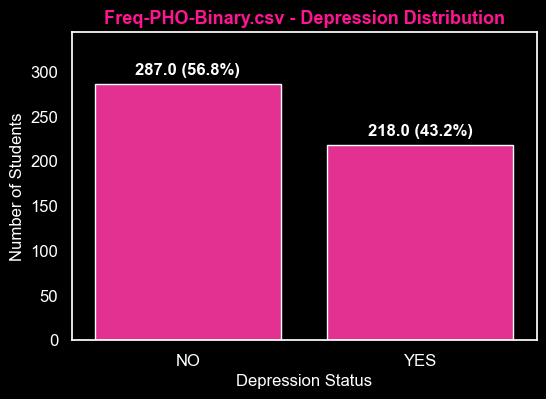

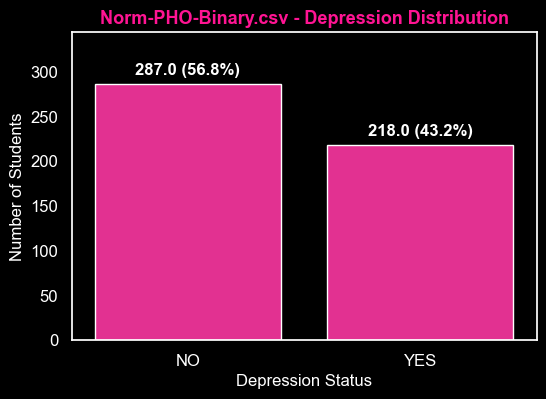

In [ ]:
# Function to plot target distribution
def plot_target_distribution(df, dataset_name):
    plt.figure(figsize=(6,4), facecolor='black')  # Figure background black
    
    # Countplot
    ax = sns.countplot(x='Depression', data=df, color='deeppink')
    ax.set_facecolor('black')
    
    # Remove grid lines
    ax.grid(False)
    
    # Increase y-axis limit to fit labels
    max_count = df['Depression'].value_counts().max()
    ax.set_ylim(0, max_count + max_count*0.2)  # Add 20% padding
    
    # Add value labels (count + percentage)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total * 100
        label = f"{height} ({percentage:.1f}%)"
        ax.text(p.get_x() + p.get_width()/2, height + 10, label,
                ha='center', color='white', fontsize=12, fontweight='bold')
    
    # Titles and labels
    ax.set_title(f'{dataset_name} - Depression Distribution', fontsize=13, color='deeppink', fontweight='bold')
    ax.set_xlabel('Depression Status', fontsize=12, color='white')
    ax.set_ylabel('Number of Students', fontsize=12, color='white')
    
    # Ticks
    ax.tick_params(axis='x', colors='white', labelsize=12)
    ax.tick_params(axis='y', colors='white', labelsize=12)
    
    plt.show()

# Apply to both datasets
plot_target_distribution(freq, "Freq-PHO-Binary.csv")
plot_target_distribution(norm, "Norm-PHO-Binary.csv")


* Overall, both datasets looks balanced:
    - 287 Students which is about 56.8% for (NO)
    - 218 Students which is about 43.2% for (YES)

### 5. Feature Exploration

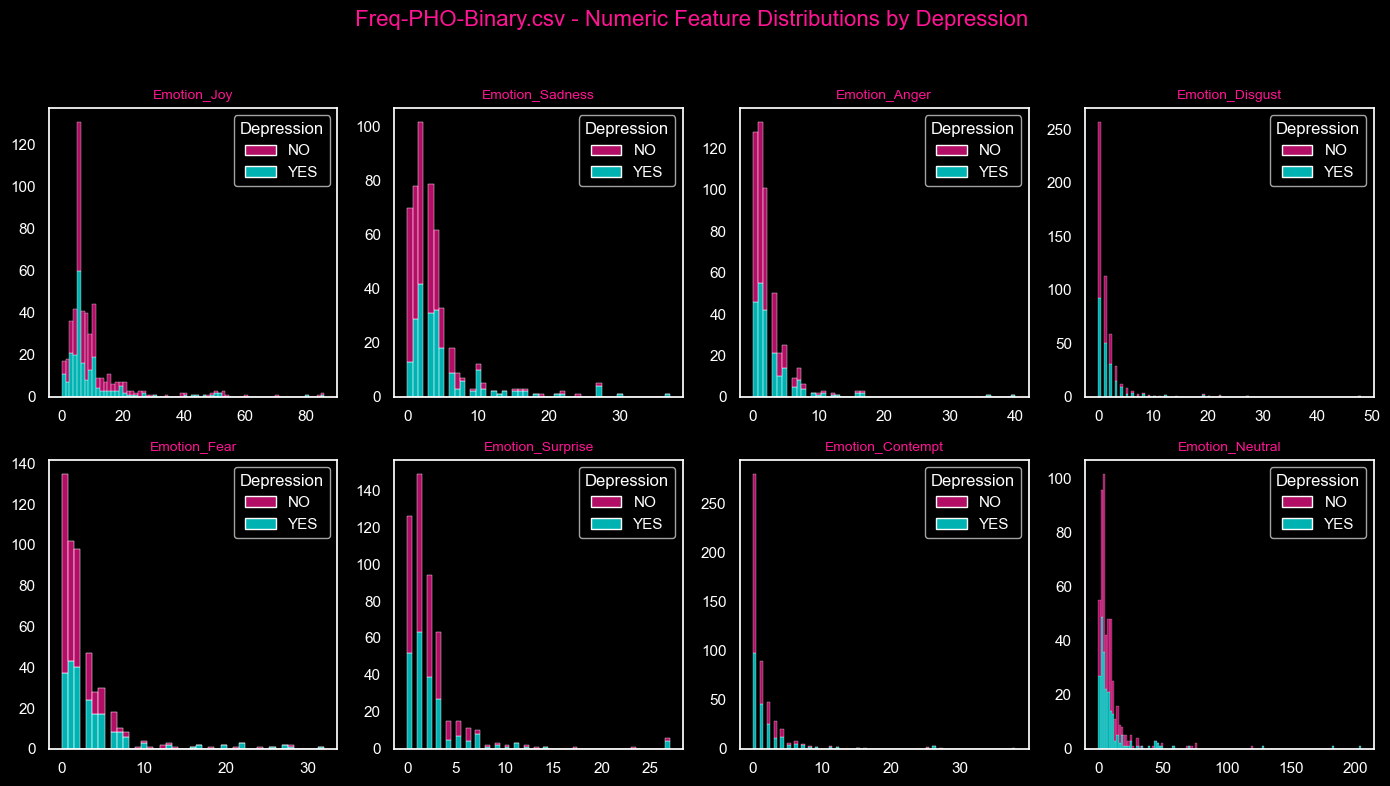

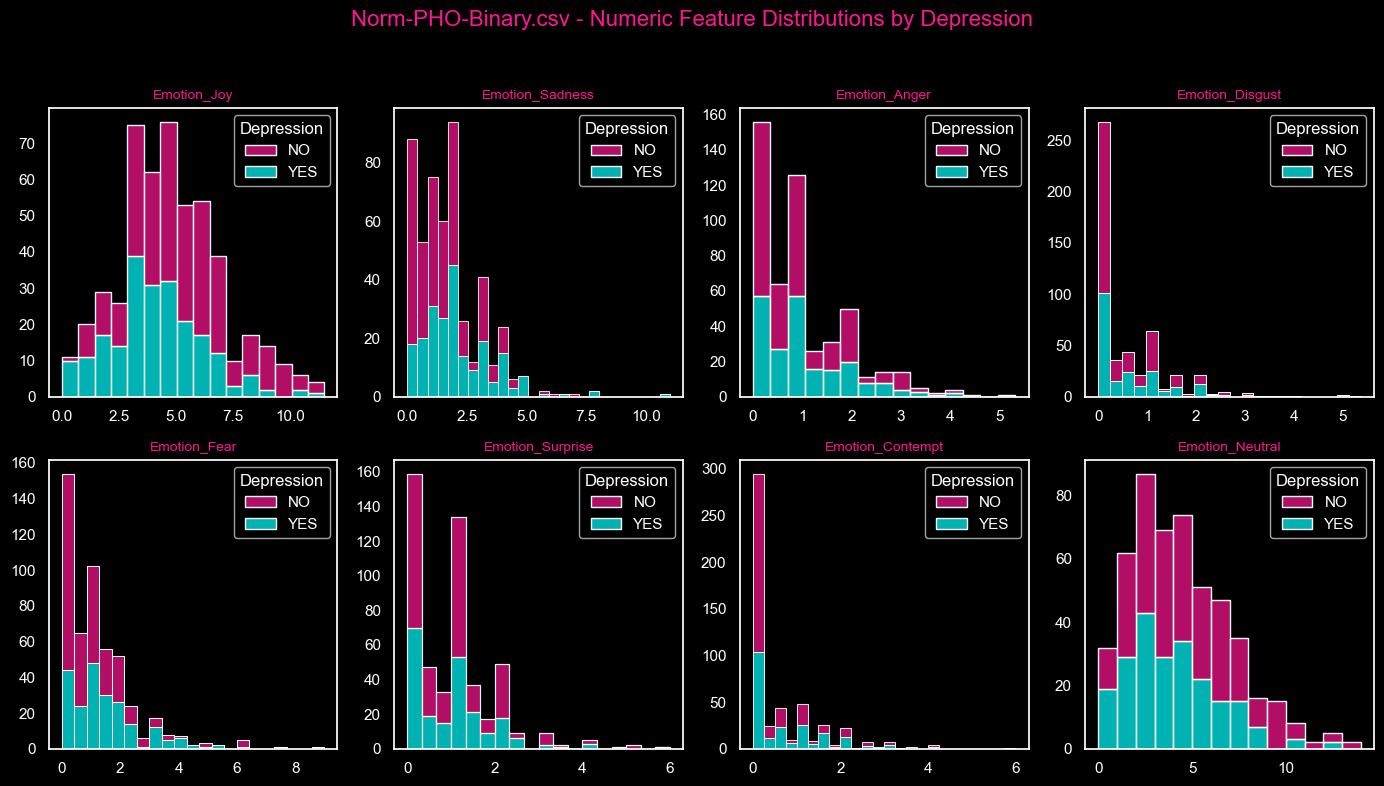

In [ ]:
# Histograms for Numeric Features (Emotions)
# Function to plot numeric features
def plot_numeric_features_hue(df, dataset_name):
    plt.figure(figsize=(14,8))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 4, i+1)
        sns.histplot(df, x=col, hue='Depression', multiple='stack',
                     palette=['deeppink', 'cyan'], edgecolor='white', alpha=0.7)
        plt.title(col, color='deeppink', fontsize=10)
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(False)
        plt.gca().set_facecolor('black')
        plt.tick_params(colors='white')
    plt.suptitle(f'{dataset_name} - Numeric Feature Distributions by Depression', fontsize=16, color='deeppink')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Apply to both datasets
plot_numeric_features_hue(freq, "Freq-PHO-Binary.csv")
plot_numeric_features_hue(norm, "Norm-PHO-Binary.csv")

The stacked histograms show that the dataset is highly imbalanced with significantly more non-depressed samples (pink) than depressed samples (teal). The distributions for both groups are heavily skewed towards lower emotion values for features like Sadness, Fear, Surprise, Contempt, and Disgust. Notably, depressed individuals contribute a visible proportion of counts at the lowest magnitude values for Sadness, Contempt, and Disgust, suggesting these low-magnitude expressions might be relevant differentiating factors.

<Figure size 1400x600 with 0 Axes>

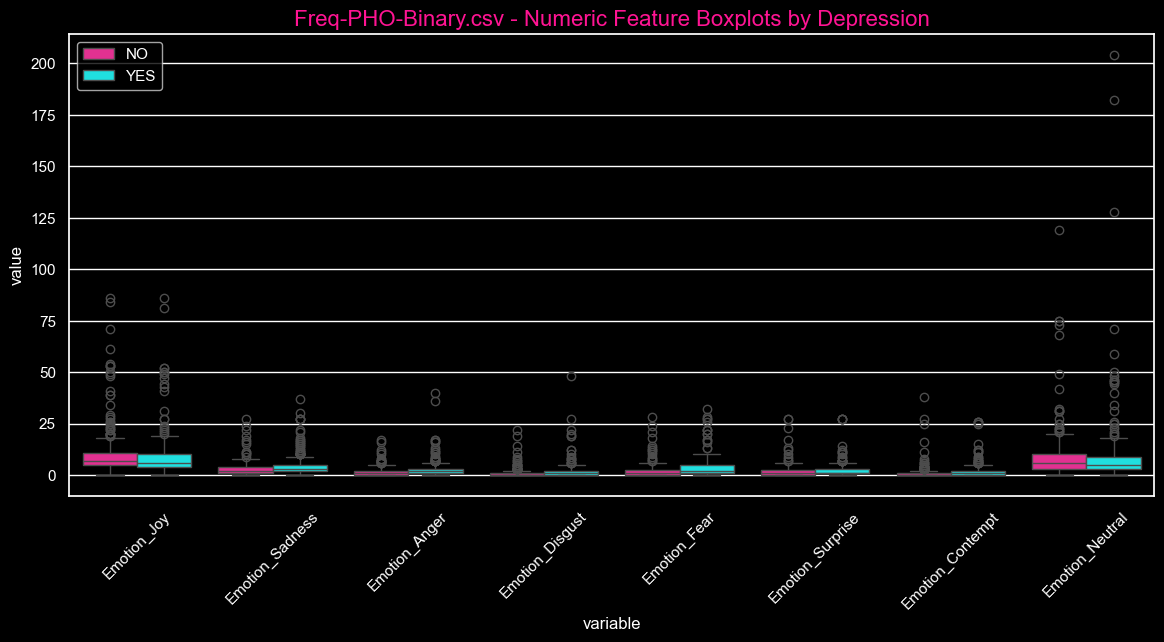

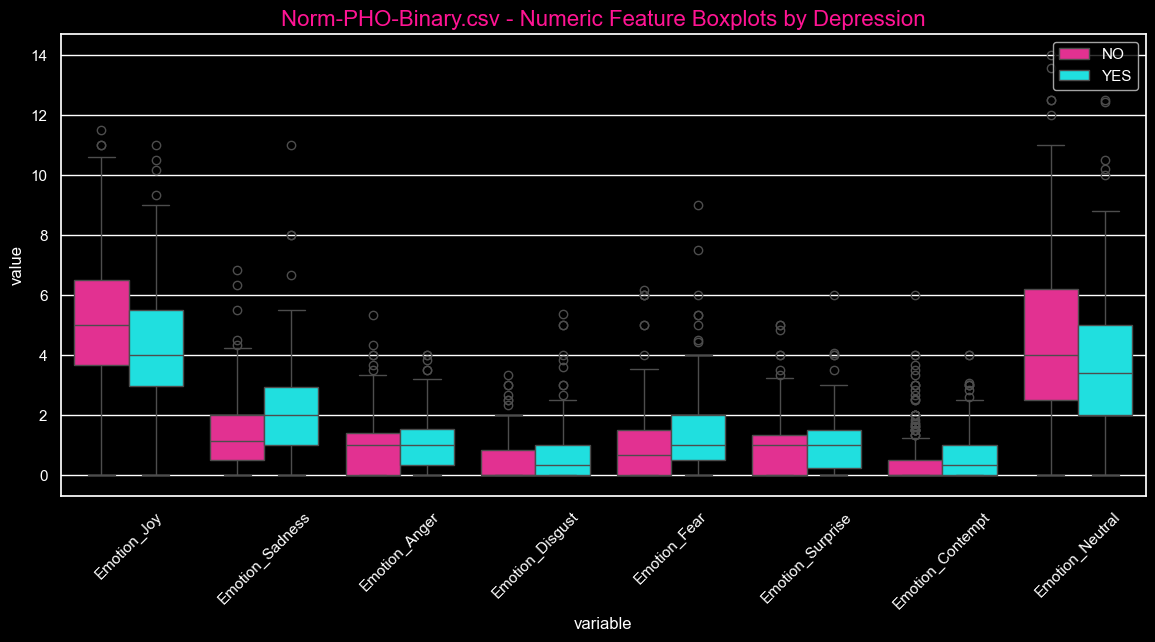

In [ ]:
# Boxplots for Numeric Features (Check Spread & Outliers)
# Function to plot boxplots for numeric features with hue based on Depression
def plot_numeric_boxplots_hue(df, dataset_name):
    plt.figure(figsize=(14,6))
    sns.boxplot(x='variable', y='value', hue='Depression',
                data=pd.melt(df[numeric_cols + ['Depression']], id_vars='Depression'),
                palette=['deeppink', 'cyan'])
    plt.title(f'{dataset_name} - Numeric Feature Boxplots by Depression', fontsize=16, color='deeppink')
    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')
    plt.gca().set_facecolor('black')
    plt.legend(facecolor='black', labelcolor='white')
    plt.show()

plot_numeric_boxplots_hue(freq, "Freq-PHO-Binary.csv")
plot_numeric_boxplots_hue(norm, "Norm-PHO-Binary.csv")

The two boxplot charts compare emotion features using Frequency (Top) versus Norm/Normalized (Bottom) metrics. The Frequency plot is highly compressed near zero for all emotions, dominated by extreme outliers and showing little difference between the depressed ("YES") and non-depressed ("NO") groups. Conversely, the Normalized plot clearly distinguishes the groups, showing that the non-depressed group generally exhibits higher Joy and lower Sadness/Anger medians, while the depressed group tends to have higher medians and wider distributions for negative and neutral emotions on this normalized scale.

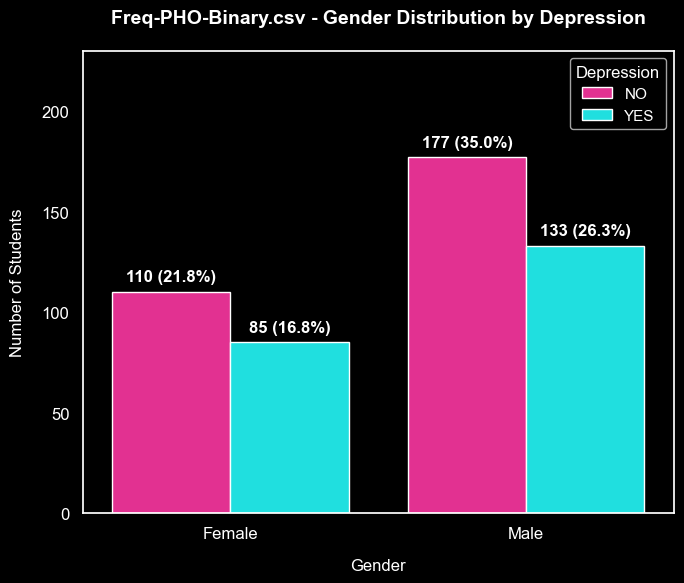

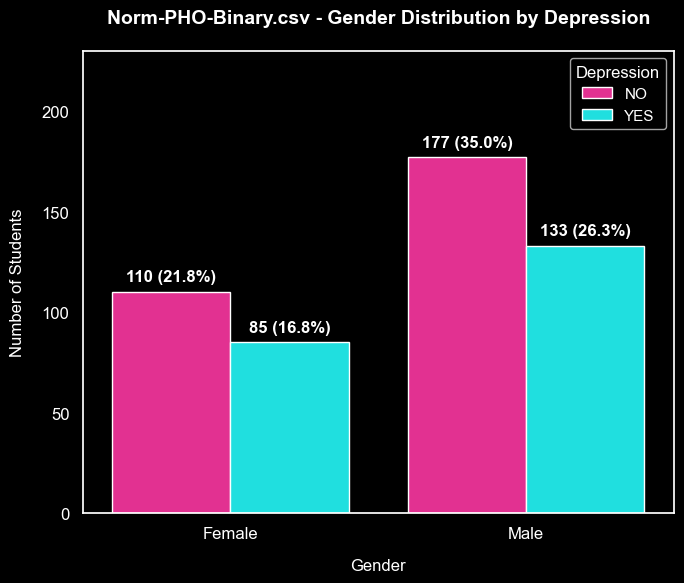

In [137]:
# Categorical Feature Exploration (Gender Counts & Proportions)
# Function to plot categorical feature with hue based on Depression
def plot_categorical_feature_hue(df, feature, dataset_name):
    plt.figure(figsize=(7,6), facecolor='black')  # wider and taller figure
    ax = sns.countplot(x=feature, hue='Depression', data=df, palette=['deeppink', 'cyan'])
    ax.set_facecolor('black')
    
    # Remove grid lines
    ax.grid(False)
    
    # Dynamically increase y-axis limit to fit labels
    max_count = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_count*1.3)  # 30% extra space
    
    # Add value labels (count + percentage)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # only add label if count > 0
            percentage = height / total * 100
            label = f"{int(height)} ({percentage:.1f}%)"
            ax.text(p.get_x() + p.get_width()/2, height + max_count*0.03, label,  # 3% of max_count above bar
                    ha='center', color='white', fontsize=12, fontweight='bold')
    
    # Titles and labels
    ax.set_title(f'{dataset_name} - {feature} Distribution by Depression', fontsize=14, color='white', fontweight='bold', pad=20)
    ax.set_xlabel(feature, fontsize=12, color='white', labelpad=12)
    ax.set_ylabel('Number of Students', fontsize=12, color='white', labelpad=12)
    
    # Ticks
    ax.tick_params(axis='x', colors='white', labelsize=12)
    ax.tick_params(axis='y', colors='white', labelsize=12)
    
    # Legend
    ax.legend(title='Depression', facecolor='black', labelcolor='white')
    
    plt.tight_layout()  # make layout fit figure
    plt.show()

# Apply to both datasets
plot_categorical_feature_hue(freq, 'Gender', "Freq-PHO-Binary.csv")
plot_categorical_feature_hue(norm, 'Gender', "Norm-PHO-Binary.csv")

Both charts show the same counts and percentages for each category: 110 non-depressed females (21.8%), 85 depressed females (16.8%), 177 non-depressed males (35.0%), and 133 depressed males (26.3%). This suggests that despite the different file frequency and normalized, the underlying demographic distribution data used for this specific visualization is the same.

#### 7. Relationships Between Features

In [150]:
from matplotlib.colors import LinearSegmentedColormap

neon_cmap = LinearSegmentedColormap.from_list(
    "neon",
    ["black", "deeppink", "white", "cyan"]
)